[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/4/W4b.ipynb)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import pickle

In [3]:
np.random.uniform(-1,2, size = 100)

array([ 1.74102744,  0.9600521 , -0.17620471,  0.74221667,  1.38638481,
        0.31353445, -0.25956584,  1.44656005,  1.34048755, -0.78852706,
        0.20012234,  0.0208035 ,  0.96581654,  0.96407577,  0.37657234,
       -0.19691793,  0.43018607, -0.70091367,  0.58609125, -0.93271226,
       -0.0464553 , -0.21140282, -0.51404825,  1.84244424,  1.38507828,
        0.16299008,  0.9704181 , -0.35376695,  0.60405721,  1.85491475,
       -0.5418088 ,  0.81538599,  0.50761777, -0.59303136, -0.67651322,
        1.6670216 , -0.03477781, -0.80897395, -0.5792876 , -0.31734099,
       -0.72956743, -0.31631914, -0.86116102,  0.56604616, -0.20747308,
        1.19459174,  1.14105322,  1.91300623,  0.60795688,  0.50381649,
        1.22029846,  0.45502415,  1.78355249, -0.65647453,  0.30806398,
        1.42965776,  0.7948494 ,  0.21628496,  1.81150339,  0.40317434,
       -0.24267567,  0.54824203,  1.47198237, -0.06629827,  1.32911502,
       -0.61501177,  0.37912984,  1.33028897, -0.37644526, -0.69

# Monte Carlo Integration
#1) Given a continuous function $f:[0,1|\to \mathbb{R}$, implement a little snippet, giving $\int_0^1 f(x) dx$ approximately.

In [4]:
def integral(f, lower:float = 0, higher:float = 1, sample_size:int = 1000, seed = None)->float:
  assert lower < higher
  if seed:  ### seed is needed to get the same result always.
    np.random.seed(seed) 
  sample = np.random.uniform(lower, higher, size = sample_size)
  f_applied = f(sample)
  return (higher-lower)*np.mean(f_applied)

In [5]:
integral(np.exp, lower = -1, higher = 1, sample_size = 1000, seed = 10)

2.3215402194970958

In [6]:
np.pi

3.141592653589793

In [7]:
f = lambda x: (x**3*np.cos(x/2) + (1/2))*np.sqrt(4-x**2)

In [30]:
integral(f, lower = -2, higher = 2, sample_size = 10000000, seed = 5)  ### we get free wifi now!!!!  I am sorry, we get nothing!!!

<ipython-input-28-6779a930610a>:1: RuntimeWarning: overflow encountered in exp
  f = lambda x : x**(-2) * np.exp(-1/x)
<ipython-input-28-6779a930610a>:1: RuntimeWarning: overflow encountered in multiply
  f = lambda x : x**(-2) * np.exp(-1/x)


inf

#2) How about $\int_{1}^{\infty} e^{-x} dx$?

In [28]:
f = lambda x : x**(-2) * np.exp(-1/x)

In [31]:
integral(f, 0, 1, sample_size = 10000000, seed = 23)

0.3678143637439341

In [27]:
np.exp(-1)

0.36787944117144233

## Normal Distribution Thing

In [33]:
X = [integral(f, 0, 1, sample_size = 1000) for i in range(1000)]

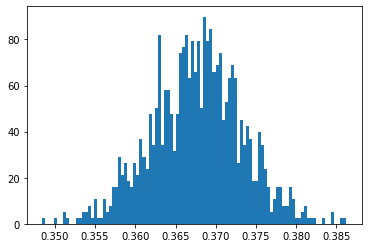

In [36]:
plt.hist(X, bins = 100, density = True);  ### This distribution of monte carlo outcomes are normally distributed.

## 3) 95% confidence Interval for $\int_0^1 \frac{1}{1+x^2} dx$.